Saving lotus.jpg to lotus.jpg
Original image loaded successfully!


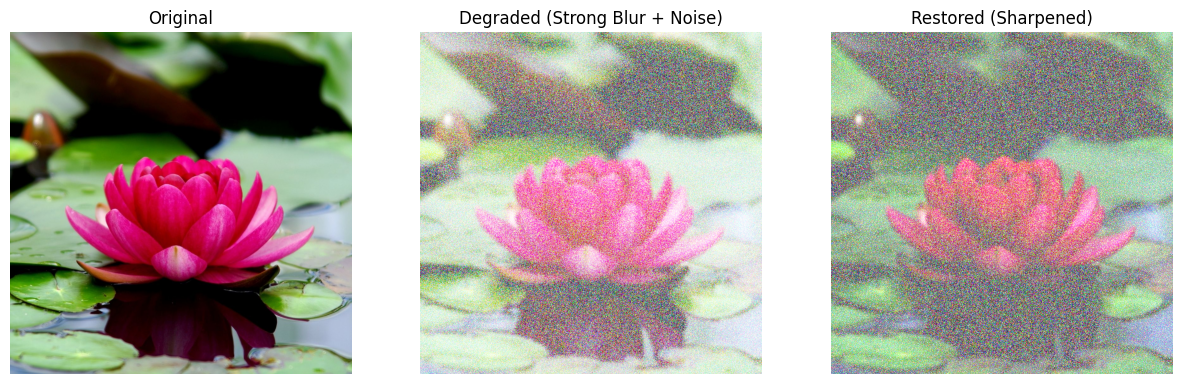

In [3]:
import cv2
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt

# Upload image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Read the image in color (BGR format)
image = cv2.imread(image_path)

if image is None:
    print("Error: Could not load image. Please check the file path.")
else:
    print("Original image loaded successfully!")

    # --- Degradation Process ---
    # 1. Apply strong Gaussian Blur (kernel size should be odd numbers)
    blurred = cv2.GaussianBlur(image, (25, 25), 0)  # BIGGER kernel for stronger blur

    # 2. Add Gaussian noise
    noise = np.random.normal(0, 30, image.shape).astype(np.uint8)
    degraded = cv2.add(blurred, noise)

    # --- Restoration Process ---
    # Use a stronger sharpening filter
    kernel = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]])
    restored = cv2.filter2D(degraded, -1, kernel)

    # --- Display results ---
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[0].set_title("Original")
    axs[0].axis('off')

    axs[1].imshow(cv2.cvtColor(degraded, cv2.COLOR_BGR2RGB))
    axs[1].set_title("Degraded (Strong Blur + Noise)")
    axs[1].axis('off')

    axs[2].imshow(cv2.cvtColor(restored, cv2.COLOR_BGR2RGB))
    axs[2].set_title("Restored (Sharpened)")
    axs[2].axis('off')

    plt.show()


Saving lady (1).jpeg to lady (1).jpeg


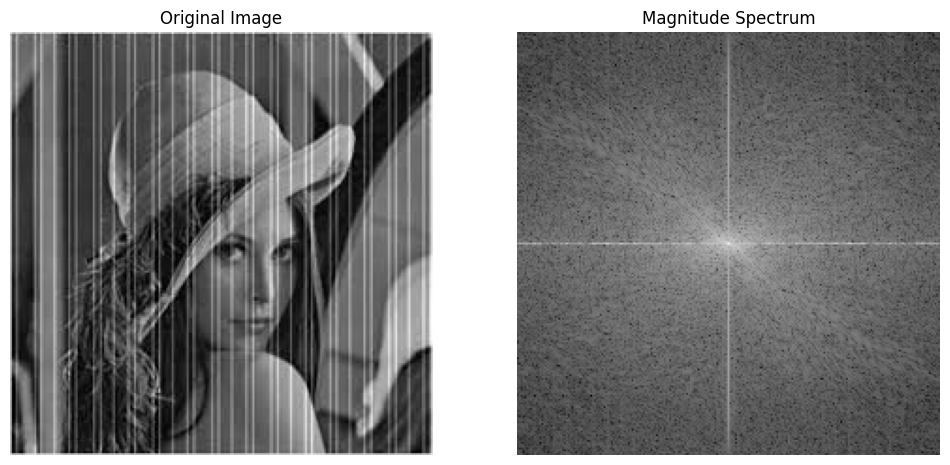

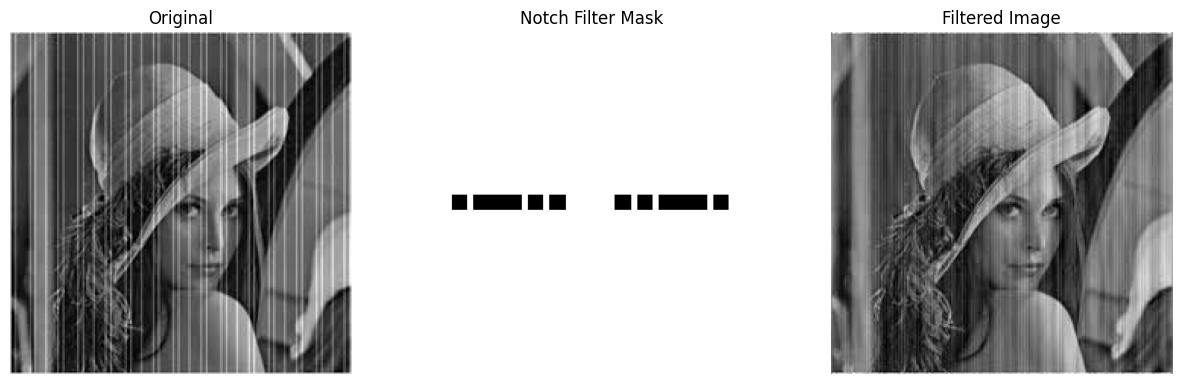

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Step 1: Upload image
uploaded = files.upload()
for fn in uploaded.keys():
    img_path = fn

# Step 2: Read image (grayscale)
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Step 3: FFT and shift
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

# Step 4: Show magnitude spectrum to see peaks
magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("Magnitude Spectrum")
plt.axis('off')
plt.show()

# Step 5: Automatic detection of bright noise peaks
rows, cols = img.shape
crow, ccol = rows//2, cols//2

mask = np.ones((rows, cols), np.uint8)
threshold = np.percentile(magnitude_spectrum, 99.9)  # detect top bright points
bright_points = np.argwhere(magnitude_spectrum > threshold)

r = 5  # radius for notch removal
for point in bright_points:
    pr, pc = point
    if abs(pr - crow) > 10 or abs(pc - ccol) > 10:  # ignore low frequencies
        mask[pr-r:pr+r, pc-r:pc+r] = 0

# Step 6: Apply mask in frequency domain
fshift_filtered = fshift * mask

# Step 7: Inverse FFT to get cleaned image
f_ishift = np.fft.ifftshift(fshift_filtered)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

# Step 8: Show results
plt.figure(figsize=(15,6))
plt.subplot(1,3,1), plt.imshow(img, cmap='gray')
plt.title('Original'), plt.axis('off')

plt.subplot(1,3,2), plt.imshow(mask*255, cmap='gray')
plt.title('Notch Filter Mask'), plt.axis('off')

plt.subplot(1,3,3), plt.imshow(img_back, cmap='gray')
plt.title('Filtered Image'), plt.axis('off')
plt.show()


Saving man.jpeg to man (1).jpeg


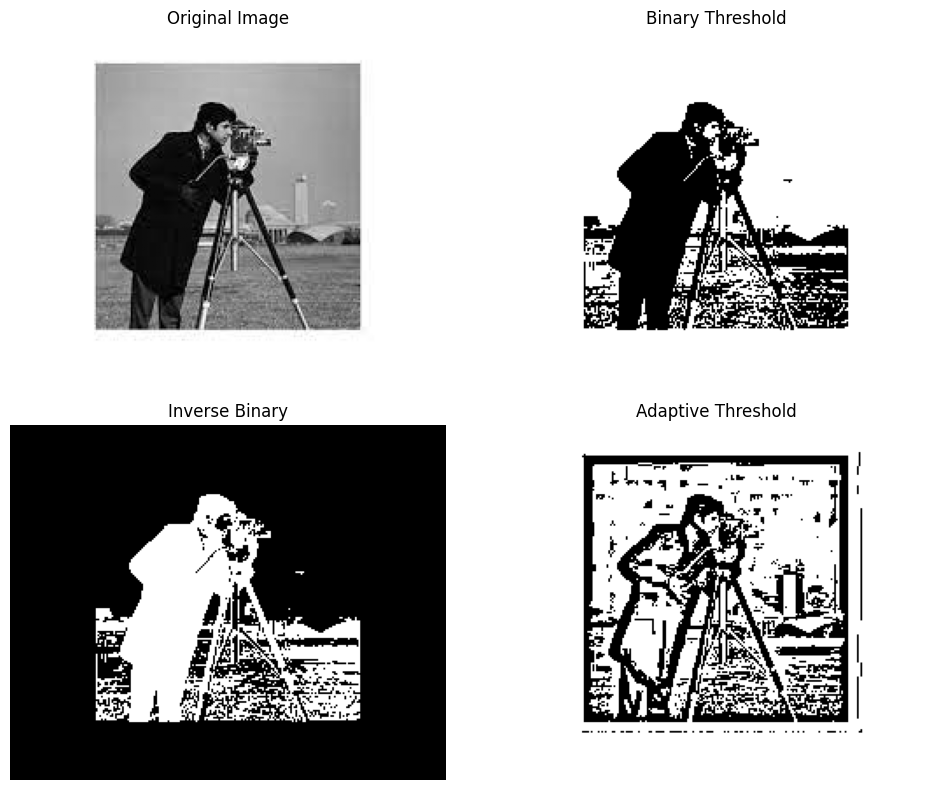

In [2]:
import cv2
import numpy as np
from google.colab import files
from matplotlib import pyplot as plt

# Step 1: Upload image
uploaded = files.upload()

# Step 2: Read uploaded file
for filename in uploaded.keys():
    img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)  # Read as grayscale

# Step 3: Apply thresholding
# Simple binary thresholding
_, thresh_binary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# Inverse binary thresholding
_, thresh_inv = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)

# Adaptive thresholding
adaptive_thresh = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                        cv2.THRESH_BINARY, 11, 2)

# Step 4: Display all results
titles = ['Original Image', 'Binary Threshold', 'Inverse Binary', 'Adaptive Threshold']
images = [img, thresh_binary, thresh_inv, adaptive_thresh]

plt.figure(figsize=(10,8))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()
